# Plots for Lagrange FEM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fembase as fem
from sympy import *
from scipy.integrate import fixed_quad
from copy import deepcopy

# 1. Lagrange shape functions

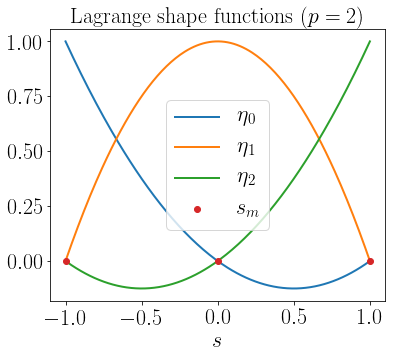

In [2]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

f1 = plt.figure()
f1.set_figheight(5)
f1.set_figwidth(6)

p = 2

knots = np.linspace(-1, 1, p + 1)
shapefun = fem.LagrangeShape(knots)
s = np.linspace(-1, 1, 200)
labels = ['$\eta_0$', '$\eta_1$', '$\eta_2$']

for i in range(p + 1):
    plt.plot(s, shapefun.eta[i](s), label = labels[i], linewidth = 2)

plt.plot(knots, np.zeros(len(knots)), 'o', label = '$s_m$')    
plt.title('Lagrange shape functions ($p=2$)', fontsize = fontsize)
plt.xlabel('$s$')
plt.legend()

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/04_NumMethods/Lagrange_shape_p=2.pdf', bbox_inches = 'tight')

# 2. Lagrange basis functions

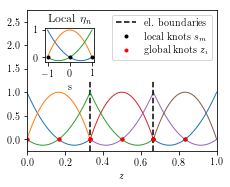

In [22]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')


f2 = plt.figure()
f2.set_figheight(2.6)
f2.set_figwidth(3.4)

L = 1
p = 2
Nel = 3
el_b = np.linspace(0, L, Nel + 1)
knots = np.linspace(-1, 1, p + 1)
shapefun = fem.LagrangeShape(knots)
s = np.linspace(-1, 1, 100)
colors = []

for ie in range(Nel):
    z = np.linspace(el_b[ie], el_b[ie + 1], 100)
    zi  = el_b[ie] + (knots + 1)/2*(el_b[ie + 1] - el_b[ie])
    el = 1
    
    
    if ie == 1:
        plt.plot(el_b[ie]*np.ones(10), np.linspace(-0.25, 1.25, 10), 'k--', label = 'el. boundaries')
    
    for il in range(p + 1):
        i = p*ie + il
        
        if i == Nel*p:
            pl = plt.plot(z, shapefun.eta[il](s), color = colors[0], linewidth = 1)
            break
        if i%p == 0 and ie != 0 and el == 1:
            pl = plt.plot(z, shapefun.eta[il](s), color = colors[-1], linewidth = 1)
            el = 0
        else:
            pl = plt.plot(z, shapefun.eta[il](s), linewidth = 1)
            colors.append(pl[0].get_color())

for i in range(2, Nel):
    plt.plot(el_b[i]*np.ones(10), np.linspace(-0.25, 1.25, 10), 'k--')  
    
    
for ie in range(Nel):
    zi  = el_b[ie] + (knots + 1)/2*(el_b[ie + 1] - el_b[ie])
    el = 1
    
    
    if ie == Nel - 1:
        plt.plot(zi[0:-1], np.zeros(len(zi[0:-1])), 'ko', label = 'local knots $s_m$', markersize = 3)
        plt.plot(zi[0:-1], np.zeros(len(zi[0:-1])), 'ro', label = 'global knots $z_i$', markersize = 3)
        
    else:
        plt.plot(zi, np.zeros(len(zi)), 'ro', markersize = 3)
        plt.plot(zi, np.zeros(len(zi)), 'ro', markersize = 3)
 
    
        
            
plt.xlim((0, L))
plt.ylim((-0.25, 2.75))
plt.xlabel('$z$')
plt.legend(loc = 'upper right')



a = plt.axes([.2, .6, .2, .18])

for i in range(p + 1):
    plt.plot(s, shapefun.eta[i](s), linewidth = 1)

plt.plot(knots, np.zeros(len(knots)), 'ko', label = '$s_m$', markersize = 3)
plt.xlabel('s')
plt.title('Local $\eta_n$')


plt.savefig('/home/florian/Schreibtisch/Masterarbeit/08_Paper/01_Figures/Lagrange_poly_p=2.pgf', bbox_inches = 'tight')

# 3. Lagrange histopolation shape functions

Text(0.5,0,'$s$')

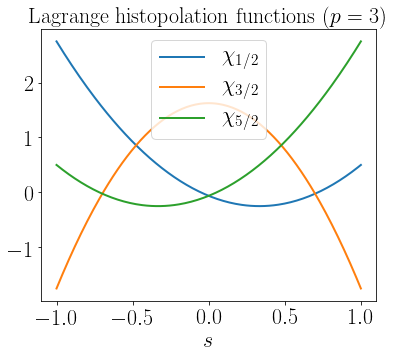

In [34]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

f3 = plt.figure()
f3.set_figheight(5)
f3.set_figwidth(6)

p = 3

knots = np.linspace(-1, 1, p + 1)
shapefun = fem.LagrangeShape(knots)
s = np.linspace(-1, 1, 200)
labels = ['$\chi_{1/2}$', '$\chi_{3/2}$', '$\chi_{5/2}$']

for i in range(p):
    plt.plot(s, shapefun.chi[i](s), label = labels[i], linewidth = 2)
    
plt.legend(loc = 'upper center')
plt.title('Lagrange histopolation functions ($p=3$)', fontsize = fontsize)
plt.xlabel('$s$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/04_NumMethods/Histo_shape_p=3.pdf', bbox_inches = 'tight')

# 4. Lagrange histopolation basis functions

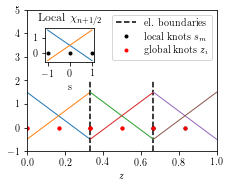

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

f4 = plt.figure()
f4.set_figheight(2.6)
f4.set_figwidth(3.4)

L = 1
p = 2
Nel = 3
el_b = np.linspace(0, L, Nel + 1)
knots = np.linspace(-1, 1, p + 1)
shapefun = fem.LagrangeShape(knots)
s = np.linspace(-1, 1, 100)


for i in range(2, Nel):
    plt.plot(el_b[i]*np.ones(10), np.linspace(-1.00, 2.00, 10), 'k--') 

for ie in range(Nel):
    z = np.linspace(el_b[ie], el_b[ie + 1], 100)
    
    if ie == 1:
        plt.plot(el_b[ie]*np.ones(10), np.linspace(-1.00, 2.00, 10), 'k--', label = 'el. boundaries')
    
    for il in range(p):
        pl = plt.plot(z, shapefun.chi[il](s), linewidth = 1)

        
    zi  = el_b[ie] + (knots + 1)/2*(el_b[ie + 1] - el_b[ie])
    el = 1
    
    
    if ie == Nel - 1:
        plt.plot(zi[0:-1], np.zeros(len(zi[0:-1])), 'ko', label = 'local knots $s_m$', markersize = 3)
        plt.plot(zi[0:-1], np.zeros(len(zi[0:-1])), 'ro', label = 'global knots $z_i$', markersize = 3)
        
    else:
        plt.plot(zi, np.zeros(len(zi)), 'ro', markersize = 3)
        plt.plot(zi, np.zeros(len(zi)), 'ro', markersize = 3)
        
        
             
 

 
plt.xlim((0, L))
plt.ylim((-1, 5.0))
plt.xlabel('$z$')
plt.legend(loc = 'upper right')


 
a = plt.axes([.2, .6, .2, .18])

for i in range(p):
    plt.plot(s, shapefun.chi[i](s), linewidth = 1)

plt.plot(knots, np.zeros(len(knots)), 'ko', label = '$s_m$', markersize = 3)
plt.xlabel('s')
plt.title('Local $\chi_{n+1/2}$')

plt.savefig('/home/florian/Schreibtisch/Masterarbeit/08_Paper/01_Figures/Lagrange_histo_p=2.pgf', bbox_inches = 'tight')

# 5. 1D Poisson solver

## 5.1 Single test

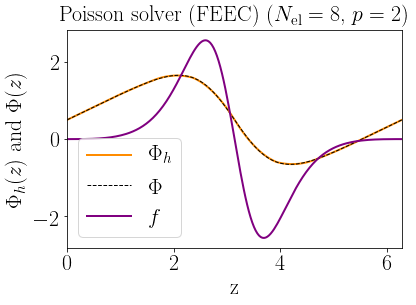

In [6]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


# ... parameters
L = 2*np.pi
Nel = 8
p = 2
el_b = np.linspace(0, L, Nel + 1)
dz = L/Nel
zplot = np.linspace(0, L, 200)
shift = 0.5
# ...


# ... create Lagrange shape functions in V0 and V1 and compute global mass matrices M0 and M1
shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]
# ...


# ... the function we want to get as a solution and the right-hand side
z = symbols('z')
u = 1/(0.5*cos(z) + 1)*sin(z) + shift

f = -diff(u, z, z)
f = lambdify(z, f)
u = lambdify(z, u)
# ...



# ... assemble gradient matrix G
grad1 = np.ones(Nbase_1 - 1)
grad2 = -np.ones(Nbase_1)
G = np.diag(grad2) + np.diag(grad1, +1)
G[-1, -1] = -1
G[-1, 0] = 1
G = 2/dz*G
# ...



# ... assemble system matrix
K = np.dot(np.transpose(G), np.dot(mass_1, G))
# ...

# ... assemble right-hand-side
fbar = fem.lag_L2prod(f, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
# ...

# .. fix the constant
K[0, :] = 0.
K[0, 0] = 1.
fbar[0] = shift
# ...

# ...solve the system
uh = np.linalg.solve(K, fbar)
fun = fem.lag_fun(uh, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
# ...


# ... plot results
plt.plot(zplot, fun(zplot), label = '$\Phi_h$', linewidth = 2, color = 'darkorange')
plt.plot(zplot, u(zplot), 'k--', label = '$\Phi$', linewidth = 1)
plt.plot(zplot, f(zplot), label = '$f$', linewidth = 2, color = 'purple')
plt.title('Poisson solver (FEEC) ($N_\mathrm{el}=8$, $p=2$)', fontsize = fontsize)
plt.xlabel('z')
plt.ylabel('$\Phi_h(z)$ and $\Phi(z)$')
plt.xlim((0, L))
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/04_NumMethods/Poisson_FEEC.pdf', bbox_inches = 'tight')
# ...

## 5.2 Convergence 

L2-error = 0.04317070200207534 degree = 1 Nel = 16
L2-error = 0.010907218633992964 degree = 1 Nel = 32
L2-error = 0.0027341046234153573 degree = 1 Nel = 64
L2-error = 0.0006839842615656355 degree = 1 Nel = 128
L2-error = 0.0001710247262365695 degree = 1 Nel = 256
L2-error = 0.00219071912504005 degree = 2 Nel = 16
L2-error = 0.00027781964710061 degree = 2 Nel = 32
L2-error = 3.484899877585482e-05 degree = 2 Nel = 64
L2-error = 4.3599396143312884e-06 degree = 2 Nel = 128
L2-error = 5.451121152868922e-07 degree = 2 Nel = 256
L2-error = 0.00014128756648950882 degree = 3 Nel = 16
L2-error = 8.94172117446434e-06 degree = 3 Nel = 32
L2-error = 5.612744785561699e-07 degree = 3 Nel = 64
L2-error = 3.512784921014851e-08 degree = 3 Nel = 128
L2-error = 2.2767490572390564e-09 degree = 3 Nel = 256


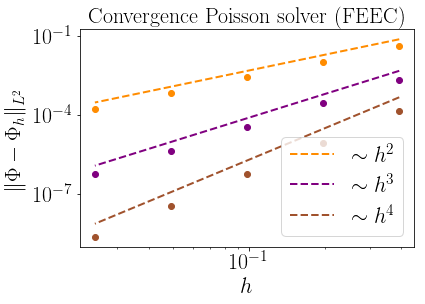

In [7]:
cases_p = 3 
cases_el = 5

L2error = np.zeros((cases_p, cases_el))
dzs = np.zeros((cases_p, cases_el))


for p in range(1, cases_p + 1):
    for i in range(3, 3 + cases_el):

        Nel = 2*2**i
        el_b = np.linspace(0, L, Nel + 1)
        dzs[p - 1, i - 3] = L/Nel
        

        shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
        Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
        Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]
        
        
        # ... assemble gradient matrix G
        grad1 = np.ones(Nbase_1 - 1)
        grad2 = -np.ones(Nbase_1)
        G = np.diag(grad2) + np.diag(grad1, +1)
        G[-1, -1] = -1
        G[-1, 0] = 1
        G = 2/dzs[p - 1, i - 3]*G
        # ...

        # ... assemble system matrix
        K = np.dot(np.transpose(G), np.dot(mass_1, G))
        # ...
        
        # ... assemble right-hand-side
        fbar = fem.lag_L2prod(f, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
        # ...

         # .. fix the constant
        K[0, :] = 0.
        K[0, 0] = 1.
        fbar[0] = shift
        # ...

        # ...solve the system
        uh = np.linalg.solve(K, fbar)
        fun = fem.lag_fun(uh, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
        # ...
        
        
        # L2-error: 
        L2error[p - 1, i - 3] = 0

        integrand = lambda x: abs(u(x) - fun(x))**2
        
        for k in range(Nel):
            L2error[p - 1, i - 3] += fixed_quad(integrand, el_b[k], el_b[k + 1])[0]

        L2error[p - 1, i - 3] = np.sqrt(L2error[p - 1, i - 3]) 
        print('L2-error =', L2error[p - 1, i - 3], 'degree =', p, 'Nel =', Nel)
        
        
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

f1 = plt.figure()
f1.set_figheight(4)
f1.set_figwidth(6)

colors = ['darkorange', 'purple', 'sienna']
abzisse = np.array([0.5, 0.08, 0.02])

labels = ['$\sim h^2$', '$\sim h^3$', '$\sim h^4$']


for p in range(cases_p):
    plt.loglog(dzs[p], L2error[p], 'o', color = colors[p])
    plt.loglog(dzs[p], abzisse[p]*dzs[p]**(p + 2), '--', color = colors[p], linewidth = 2, label = labels[p])
    
plt.xlabel('$h$')
plt.title('Convergence Poisson solver (FEEC)', fontsize = fontsize)
plt.ylabel('$\|\Phi - \Phi_h \|_{L^2}$')
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/04_NumMethods/Poisson_FEEC_convergence.pdf', bbox_inches = 'tight')

## 5.3  Mixed formulation

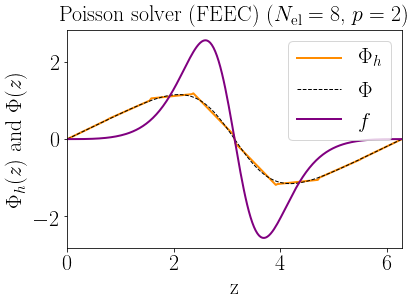

In [38]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


# ... parameters
L = 2*np.pi
Nel = 8
p = 2
el_b = np.linspace(0, L, Nel + 1)
el_b2 = np.linspace(0, L, np.int(Nel/2) + 1)
dz = L/Nel
zplot = np.linspace(0, L, 200)
shift = 0
# ...


# ... create Lagrange shape functions in V0 and V1 and compute global mass matrices M0 and M1
shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
shapefun2 = fem.LagrangeShape(np.linspace(-1, 1, p + 2))

Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]
mass_0_inv = np.linalg.inv(mass_0)
# ...


# ... the function we want to get as a solution and the right-hand side
z = symbols('z')
u = 1/(0.5*cos(z) + 1)*sin(z) + shift

f = -diff(u, z, z)
f = lambdify(z, f)
u = lambdify(z, u)
# ...



# ... assemble gradient matrix G
grad1 = np.ones(Nbase_1 - 1)
grad2 = -np.ones(Nbase_1)
G = np.diag(grad2) + np.diag(grad1, +1)
G[-1, -1] = -1
G[-1, 0] = 1
G = 2/dz*G
# ...

# ... assemble right-hand-side
fbar = fem.lag_L2prod(f, shapefun.chi, el_b, basis = 2, bcs = 1)[2]
# ...



# ... assemble block matrix and block RHS
mat = np.dot(mass_1, G)
mat[-1, :] = 0.

temp0 = np.zeros((Nbase_1, Nbase_1))
temp0[-1, :] = 1.

Block = np.block([[mass_0, -np.dot(np.transpose(G), mass_1)], [mat, temp0]])


temp = np.zeros(Nbase_1)
fbar_block = np.concatenate((temp, fbar))
fbar_block[-1] = 2*shift*Nel
# ...


# ...solve the system
uh_temp = np.linalg.solve(Block, fbar_block)
uh = uh_temp[Nbase_1:]
fun = fem.lag_fun(uh, shapefun.chi, el_b, basis = 2, bcs = 1)[2]
# ...

# ... plot results
plt.plot(zplot, fun(zplot), label = '$\Phi_h$', linewidth = 2, color = 'darkorange')
plt.plot(zplot, u(zplot), 'k--', label = '$\Phi$', linewidth = 1)
plt.plot(zplot, f(zplot), label = '$f$', linewidth = 2, color = 'purple')
plt.title('Poisson solver (FEEC) ($N_\mathrm{el}=8$, $p=2$)', fontsize = fontsize)
plt.xlabel('z')
plt.ylabel('$\Phi_h(z)$ and $\Phi(z)$')
plt.xlim((0, L))
plt.legend()
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/04_NumMethods/Poisson_FEEC.pdf', bbox_inches = 'tight')
# ...

## 5.4 Convergence

L2-error = 0.25088616416107656 degree = 1 Nel = 16
L2-error = 0.12488617422098322 degree = 1 Nel = 32
L2-error = 0.06235839780095011 degree = 1 Nel = 64
L2-error = 0.031168106905936306 degree = 1 Nel = 128
L2-error = 0.015582650855808435 degree = 1 Nel = 256
L2-error = 0.017720113952464277 degree = 2 Nel = 16
L2-error = 0.004458493724253366 degree = 2 Nel = 32
L2-error = 0.0011165404745896823 degree = 2 Nel = 64
L2-error = 0.00027925700021439224 degree = 2 Nel = 128
L2-error = 6.982190036257938e-05 degree = 2 Nel = 256
L2-error = 0.0012046027296994078 degree = 3 Nel = 16
L2-error = 0.00015231569899908155 degree = 3 Nel = 32
L2-error = 1.9092190196324577e-05 degree = 3 Nel = 64
L2-error = 2.3881813192139833e-06 degree = 3 Nel = 128
L2-error = 2.9857512450676765e-07 degree = 3 Nel = 256


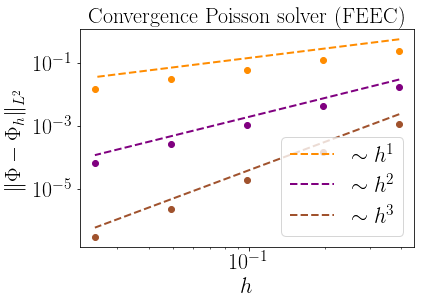

In [39]:
cases_p = 3 
cases_el = 5

L2error = np.zeros((cases_p, cases_el))
dzs = np.zeros((cases_p, cases_el))


for p in range(1, cases_p + 1):
    for i in range(3, 3 + cases_el):

        Nel = 2*2**i
        el_b = np.linspace(0, L, Nel + 1)
        dzs[p - 1, i - 3] = L/Nel
        

        shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
        Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
        Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]
        
        
        # ... assemble gradient matrix G
        grad1 = np.ones(Nbase_1 - 1)
        grad2 = -np.ones(Nbase_1)
        G = np.diag(grad2) + np.diag(grad1, +1)
        G[-1, -1] = -1
        G[-1, 0] = 1
        G = 2/dzs[p - 1, i - 3]*G
        # ...

        
        # ... assemble right-hand-side
        fbar = fem.lag_L2prod(f, shapefun.chi, el_b, basis = 2, bcs = 1)[2]
        # ...

        # ... assemble block matrix and block RHS
        mat = np.dot(mass_1, G)
        mat[-1, :] = 0.

        temp0 = np.zeros((Nbase_1, Nbase_1))
        temp0[-1, :] = 1.

        Block = np.block([[mass_0, -np.dot(np.transpose(G), mass_1)], [mat, temp0]])


        temp = np.zeros(Nbase_1)
        fbar_block = np.concatenate((temp, fbar))
        fbar_block[-1] = 2*shift*Nel
        # ...


        # ...solve the system
        uh_temp = np.linalg.solve(Block, fbar_block)
        uh = uh_temp[Nbase_1:]
        fun = fem.lag_fun(uh, shapefun.chi, el_b, basis = 2, bcs = 1)[2]
        # ...
        
        # L2-error: 
        L2error[p - 1, i - 3] = 0

        integrand = lambda x: abs(u(x) - fun(x))**2
        
        for k in range(Nel):
            L2error[p - 1, i - 3] += fixed_quad(integrand, el_b[k], el_b[k + 1])[0]

        L2error[p - 1, i - 3] = np.sqrt(L2error[p - 1, i - 3]) 
        print('L2-error =', L2error[p - 1, i - 3], 'degree =', p, 'Nel =', Nel)
        
        
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

f1 = plt.figure()
f1.set_figheight(4)
f1.set_figwidth(6)

colors = ['darkorange', 'purple', 'sienna']
abzisse = np.array([1.5, 0.2, 0.04])

labels = ['$\sim h^1$', '$\sim h^2$', '$\sim h^3$']


for p in range(cases_p):
    plt.loglog(dzs[p], L2error[p], 'o', color = colors[p])
    plt.loglog(dzs[p], abzisse[p]*dzs[p]**(p + 1), '--', color = colors[p], linewidth = 2, label = labels[p])
    
plt.xlabel('$h$')
plt.title('Convergence Poisson solver (FEEC)', fontsize = fontsize)
plt.ylabel('$\|\Phi - \Phi_h \|_{L^2}$')
plt.legend()
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/04_NumMethods/Poisson_FEEC_convergence.pdf', bbox_inches = 'tight')

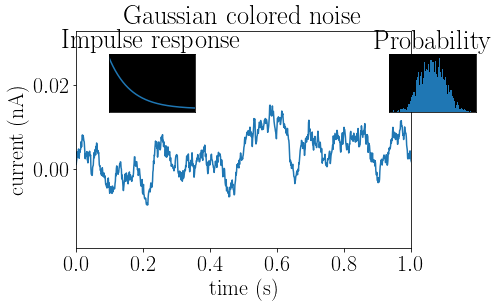

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1 * np.min(s), 2 * np.max(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.85, .6, .2, .2], facecolor='k')
n, bins, patches = plt.hist(s, 400, density=True)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='k')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()
